   DAT_MOVIMENTO COD_UNNEGOCIO     QTD
0        2019/11           SP2  143616
1        2019/11            CO  133019
2        2019/11            NO   53153
3        2019/11            NE  121208
4        2019/11           SP1   64975
5        2019/11            RS   74115
6        2019/11         BA/SE   64099
7        2019/11         PR/SC   83287
8        2019/11         RJ/ES   82613
9        2019/11            MG   67399
10       2019/12            NO   10124
11       2019/12         RJ/ES   16658
12       2019/12           SP1   12429
13       2019/12            CO   27065
14       2019/12         PR/SC   18694
15       2019/12            RS   17181
16       2019/12           SP2   31045
17       2019/12            NE   23699
18       2019/12            MG   14457
19       2019/12         BA/SE   13497
DAT_MOVIMENTO  2019/11  2019/12
COD_UNNEGOCIO                  
BA/SE            64099    13497
CO              133019    27065
MG               67399    14457
NE              12120

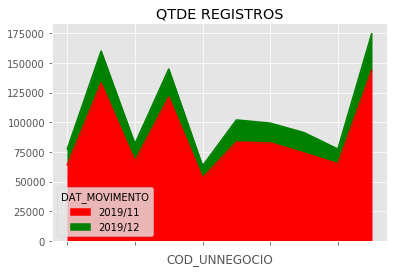

In [19]:
__author__ = 'CARLOS TOME'
 
import cx_Oracle
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
 
def read_from_db (username, password, connectString, mode=None, save=False):
 
    if mode is None:
        connection = cx_Oracle.connect(username, password, connectString)
    else:
        connection = cx_Oracle.connect(username, password, connectString, mode)
    with connection:
        try:
            df = pd.read_sql_query("SELECT /*+PARALLEL(12)*/ \
                                    TO_CHAR(TO_DATE(DAT_MOVIMENTO,'YYYY/MM/DD'),'YYYY/MM') AS DAT_MOVIMENTO\
                                    ,COD_UNNEGOCIO \
                                    ,COUNT (*) AS QTD\
                                   FROM INFOWEB.EXTRACAO_114_LOAD\
                                    WHERE TO_DATE(DAT_MOVIMENTO,'YYYY/MM/DD')\
                                    BETWEEN TRUNC(ADD_MONTHS(SYSDATE,-1),'MM') AND SYSDATE\
                                    GROUP BY\
                                    TO_CHAR(TO_DATE(DAT_MOVIMENTO,'YYYY/MM/DD'),'YYYY/MM'),\
                                    COD_UNNEGOCIO\
                                    ORDER BY 1",
                                   connection)
            if save:
                df.to_csv('F:\output\output_arq.csv')
            return df
        except cx_Oracle.DatabaseError as dberror:
            print(dberror)
 
def read_from_file(filename):
    return pd.read_csv(filename, parse_dates=['DAT_MOVIMENTO']) 
 
if __name__ == '__main__':
    style.use('ggplot')
    df = read_from_db(username='u92277452', password='carlos#201911', connectString='(DESCRIPTION=(SOURCE_ROUTE=OFF)(ADDRESS_LIST=(ADDRESS=(PROTOCOL=TCP)(HOST=172.25.35.33)(PORT=1521)))(CONNECT_DATA=(SERVICE_NAME = P00DW1)))')
    # df = read_from_file('results.csv') 
    print (df.head(50)) 
    pdf = df.pivot(index='COD_UNNEGOCIO', columns='DAT_MOVIMENTO', values='QTD') 
    print (pdf.head()) 
    pdf.plot(kind='area', stacked=True, title='QTDE REGISTROS', color=['red', 'green', 'orange', 'darkred', 'brown', 'brown', 'pink', 'lightgreen', 'cyan', 'blue'])
    plt.show()